# Chargement des données

In [15]:
import numpy
from PIL import Image
from sklearn import datasets

image_path = "../data/processed"
# Charge la structure, mais pas les images. Nous allons devoir les redimensionner uniformément
recapp_dataset = datasets.load_files(image_path, load_content=False)

# Affichage de la structure
print(recapp_dataset.keys())

# Taille des images voulues
uniformized_image_size = 64

# On recrée la clé 'data'
recapp_dataset['data'] = []
for image_path in recapp_dataset['filenames']:
    with Image.open(image_path) as im: # Ouverture de l'image
        resized = im.resize((uniformized_image_size, uniformized_image_size)) # Redimension
        image_as_array = numpy.asarray(resized).reshape(-1) # Conversion en 1 seul vecteur de couleurs
        recapp_dataset['data'].append(image_as_array) # Ajout à la liste de 'data'

# On crée des raccourcis pour rendre le code plus lisible et facile à écrire
data = recapp_dataset['data']
labels = recapp_dataset['target']

print("done!")

dict_keys(['filenames', 'target_names', 'target', 'DESCR'])
done!


# Multi-Layer Perceptron

Iteration 1, loss = 21.32851814
Iteration 2, loss = 16.00124376
Iteration 3, loss = 10.57545814
Iteration 4, loss = 7.04507076
Iteration 5, loss = 5.48238297
Iteration 6, loss = 4.86843642
Iteration 7, loss = 4.58862358
Iteration 8, loss = 4.41762794
Iteration 9, loss = 4.30978968
Iteration 10, loss = 4.20851444
Iteration 11, loss = 4.13081305
Iteration 12, loss = 4.05331794


c:\users\jorouss\documents\ia\projet recapp\recapp_environnement\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<AxesSubplot:>

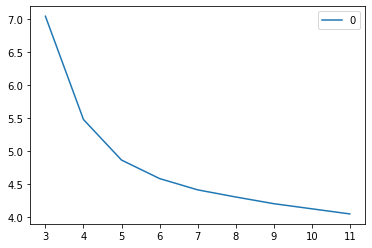

In [16]:
from sklearn.neural_network import MLPClassifier
import pandas as pd

nn = MLPClassifier(random_state=42, hidden_layer_sizes=(50,25), learning_rate_init=0.0000003, max_iter=12, verbose=2)

nn.fit(data, labels)

pd.DataFrame(nn.loss_curve_)[3:].plot()

# Matrice de confusion

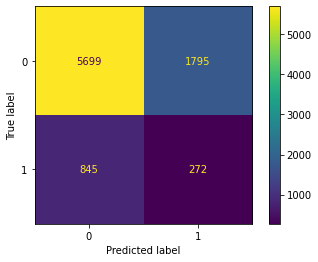

In [17]:
import sklearn.metrics as metrics

metrics.plot_confusion_matrix(nn, data, labels)

# Sur échantillonnage des éperlans

## Séparation par classe

In [18]:
data_lancons = []
data_eperlans = []
labels_lancons = []
labels_eperlans = []

for i in range(len(data)):
    current_label = labels[i]
    current_data = data[i]
    if current_label == 0:
        data_lancons.append(current_data)
        labels_lancons.append(current_label)
    elif current_label == 1:
        data_eperlans.append(current_data)
        labels_eperlans.append(current_label)
    else:
        print("Invalid class")
    
print("Lancons:", len(data_lancons), "Éperlans:", len(data_eperlans))

Lancons: 7494 Éperlans: 1117


## Sklearn resample

In [19]:
from sklearn.utils import resample

(data_eperlans_upsampled, labels_eperlans_upsampled) = resample(data_eperlans, labels_eperlans, n_samples=len(data_lancons), random_state=42)

data_balanced = data_lancons + data_eperlans_upsampled
labels_balanced = labels_lancons + labels_eperlans_upsampled

print("Images total:", len(data_balanced))

Images total: 14988


## Nouvel entrainement avec les nouvelles données

Iteration 1, loss = 11.51025139
Iteration 2, loss = 8.11138265
Iteration 3, loss = 7.13452865
Iteration 4, loss = 6.73476512
Iteration 5, loss = 6.37609302
Iteration 6, loss = 6.02086626
Iteration 7, loss = 5.68452975
Iteration 8, loss = 5.38669675
Iteration 9, loss = 5.12950438
Iteration 10, loss = 4.89337990
Iteration 11, loss = 4.66471559
Iteration 12, loss = 4.45699056


c:\users\jorouss\documents\ia\projet recapp\recapp_environnement\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (12) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


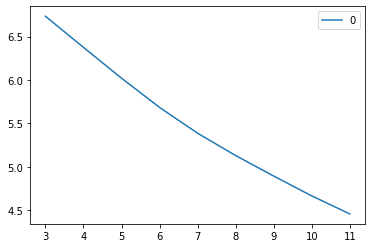

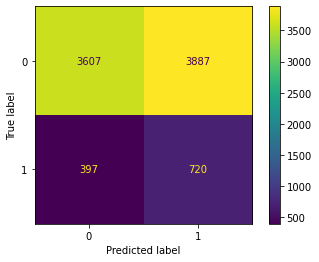

In [21]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
import pandas as pd

nn = MLPClassifier(random_state=42, hidden_layer_sizes=(50,25), learning_rate_init=0.0000003, max_iter=12, verbose=2)

nn.fit(data_balanced, labels_balanced)

pd.DataFrame(nn.loss_curve_)[3:].plot()

metrics.plot_confusion_matrix(nn, data, labels)

# Améliorations

Iteration 1, loss = 10.59828825
Iteration 2, loss = 6.52103268
Iteration 3, loss = 5.20414205
Iteration 4, loss = 4.14016007
Iteration 5, loss = 3.53830468
Iteration 6, loss = 3.12113365
Iteration 7, loss = 2.73762655
Iteration 8, loss = 2.49730169
Iteration 9, loss = 2.30628524
Iteration 10, loss = 2.12712548
Iteration 11, loss = 1.97283930
Iteration 12, loss = 1.83012550
Iteration 13, loss = 1.68906667
Iteration 14, loss = 1.58940450
Iteration 15, loss = 1.49016576
Iteration 16, loss = 1.39963303
Iteration 17, loss = 1.32429849
Iteration 18, loss = 1.25556290
Iteration 19, loss = 1.19091310
Iteration 20, loss = 1.13208484
Iteration 21, loss = 1.07222806
Iteration 22, loss = 1.02155641
Iteration 23, loss = 0.97367549
Iteration 24, loss = 0.92721227
Iteration 25, loss = 0.88180573
Iteration 26, loss = 0.84980822
Iteration 27, loss = 0.81082711
Iteration 28, loss = 0.77806247
Iteration 29, loss = 0.74569505
Iteration 30, loss = 0.71376355
Iteration 31, loss = 0.68612689
Iteration 32, lo

c:\users\jorouss\documents\ia\projet recapp\recapp_environnement\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


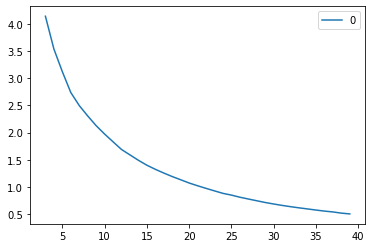

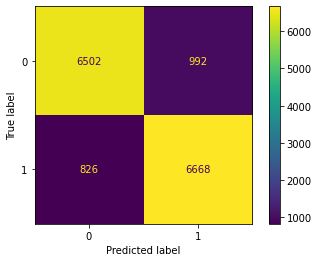

In [28]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
import pandas as pd

nn = MLPClassifier(random_state=42, hidden_layer_sizes=(50,25), learning_rate_init=0.00005, max_iter=40, verbose=2, batch_size=5000)

nn.fit(data_balanced, labels_balanced)

pd.DataFrame(nn.loss_curve_)[3:].plot()
metrics.plot_confusion_matrix(nn, data_balanced, labels_balanced)

# Validation

In [30]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(data_balanced, labels_balanced, random_state=42)

Iteration 1, loss = 11.11848792
Iteration 2, loss = 6.53828939
Iteration 3, loss = 5.07830277
Iteration 4, loss = 4.02703795
Iteration 5, loss = 3.44358437
Iteration 6, loss = 2.99715840
Iteration 7, loss = 2.79842896
Iteration 8, loss = 2.52898015
Iteration 9, loss = 2.28637185
Iteration 10, loss = 2.13027094
Iteration 11, loss = 1.96834475
Iteration 12, loss = 1.80110118
Iteration 13, loss = 1.68608153
Iteration 14, loss = 1.56554913
Iteration 15, loss = 1.44585991
Iteration 16, loss = 1.35160148
Iteration 17, loss = 1.27856743
Iteration 18, loss = 1.20653879
Iteration 19, loss = 1.14790636
Iteration 20, loss = 1.09603772
Iteration 21, loss = 1.02935681
Iteration 22, loss = 0.97522606
Iteration 23, loss = 0.93218262
Iteration 24, loss = 0.89203489
Iteration 25, loss = 0.85498442
Iteration 26, loss = 0.82104552
Iteration 27, loss = 0.78725084
Iteration 28, loss = 0.76115407
Iteration 29, loss = 0.73157084
Iteration 30, loss = 0.69958708
Iteration 31, loss = 0.68118932
Iteration 32, lo

c:\users\jorouss\documents\ia\projet recapp\recapp_environnement\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


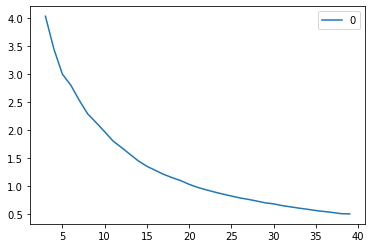

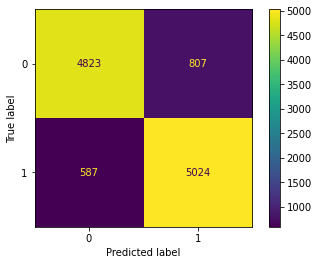

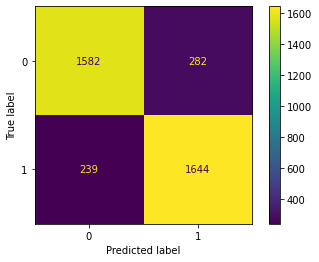

In [31]:
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as metrics
import pandas as pd

nn = MLPClassifier(random_state=42, hidden_layer_sizes=(50,25), learning_rate_init=0.00005, max_iter=40, verbose=2, batch_size=5000)

nn.fit(train_data, train_labels)

pd.DataFrame(nn.loss_curve_)[3:].plot()
metrics.plot_confusion_matrix(nn, train_data, train_labels)
metrics.plot_confusion_matrix(nn, test_data, test_labels)